# Libraries

In [ ]:
!pip install pandas
!pip install sodapy

In [ ]:
from sodapy import Socrata
import numpy as np
import pandas as pd

# Data

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7x5e-2fxh", limit=2000) #feel free to unlimit this if you'd like. 2000 is sufficient for the hackathon (if not doing ML)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df = results_df.replace('Not Available', np.nan)

In [ ]:
results_df.iloc[:,[2,3,4,90,130,200]]

,parent_property_id,parent_property_name,year_ending,automobile_dealership_gross,medical_office_number_of,estimated_data_flag_fuel_3
0,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,NaN
1,20599688,Stellar - Campus West 93rd Street,2021-12-31T00:00:00.000,NaN,NaN,No
2,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,17.93,No
3,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,No
4,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,No
...,...,...,...,...,...,...
1995,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,NaN
1996,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,NaN
1997,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,NaN
1998,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31T00:00:00.000,NaN,NaN,NaN


In [ ]:
# drop extraneous columns

# Define the columns to subset based on the categories provided
location_data_columns = ['property_id', 'latitude', 'longitude', 'borough', 'nta']

property_use_details_columns = [
    'primary_property_type',
    'largest_property_use_type',
    'largest_property_use_type_1',
    '_2nd_largest_property_use',
    '_2nd_largest_property_use_1',
    '_3rd_largest_property_use',
    'year_built',
    'construction_status',
    'number_of_buildings',
    'occupancy',
    'metered_areas_energy',
    'metered_areas_water',
    '_3rd_largest_property_use_1',
    'national_median_reference',
    'property_gfa_calculated_1',
    'last_modified_date_property',
    'last_modified_date_electric',
    'last_modified_date_gas_meters',
    'last_modified_date_non',
    'last_modified_date_water',
    'last_modified_date_property_1'
]

energy_use_metrics_columns = [
    'reason_s_for_no_score',
    'energy_star_score',
    'energy_star_certification',
    'energy_star_certification_1',
    'site_eui_kbtu_ft',
    'weather_normalized_site_eui',
    'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    'weather_normalized_source_1',
    'fuel_oil_1_use_kbtu',
    'fuel_oil_2_use_kbtu',
    'fuel_oil_4_use_kbtu',
    'fuel_oil_5_6_use_kbtu',
    'diesel_2_use_kbtu',
    'propane_use_kbtu',
    'district_steam_use_kbtu',
    'district_hot_water_use_kbtu',
    'district_chilled_water_use',
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    'weather_normalized_site_2',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    'weather_normalized_site_3',
    'electricity_use_grid_purchase_2',
    'electricity_use_grid_purchase_3',
    'electricity_use_generated',
    'electricity_use_generated_1',
    'electricity_use_generated_2',
    'electricity_use_generated_3',
    'annual_maximum_demand_kw',
    'annual_maximum_demand_mm',
    'annual_maximum_demand_meter',
    'green_power_onsite_kwh',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    'total_ghg_emissions_metric',
    'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    'direct_ghg_emissions_intensity',
    'indirect_ghg_emissions_metric',
    'net_emissions_metric_tons',
    'indirect_ghg_emissions',
    'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_onsite',
    'avoided_emissions_offsite',
    'avoided_emissions_onsite_1',
    'percent_of_recs_retained',
    'percent_of_total_electricity',
    'water_use_all_water_sources',
    'municipally_supplied_potable',
    'municipally_supplied_potable_1',
    'municipally_supplied_potable_2',
    'municipally_supplied_potable_3'
]
data_quality_columns = [
    'estimated_data_flag',
    'estimated_data_flag_natural',
    'estimated_data_flag_fuel',
    'estimated_data_flag_fuel_1',
    'estimated_data_flag_fuel_2',
    'estimated_data_flag_fuel_3',
    'estimated_data_flag_district',
    'estimated_data_flag_1',
    'estimated_values_energy',
    'estimated_values_water',
    'alert_data_center_issue_with',
    'alert_energy_meter_has_less',
    'alert_energy_meter_has_gaps',
    'alert_energy_meter_has',
    'alert_energy_no_meters',
    'alert_energy_meter_has_single',
    'alert_water_meter_has_less',
    'alert_property_has_no_uses'
]

# Combine all columns into a single list
all_subset_columns = location_data_columns + property_use_details_columns + energy_use_metrics_columns + data_quality_columns

# Subset the dataframe based on these columns
df = results_df[all_subset_columns]

# Show the first few rows of the subsetted dataframe



In [ ]:
# convert to Nan

df = df.replace('Not Available', np.nan)

In [ ]:
# filter for whole metered

df = df.loc[df['metered_areas_water'] == 'Whole Property']
df = df.loc[df['metered_areas_energy'] == 'Whole Property']
df = df.loc[df['construction_status'] == 'Existing']

In [ ]:
df

,property_id,latitude,longitude,borough,nta,primary_property_type,largest_property_use_type,largest_property_use_type_1,_2nd_largest_property_use,_2nd_largest_property_use_1,...,estimated_values_energy,estimated_values_water,alert_data_center_issue_with,alert_energy_meter_has_less,alert_energy_meter_has_gaps,alert_energy_meter_has,alert_energy_no_meters,alert_energy_meter_has_single,alert_water_meter_has_less,alert_property_has_no_uses
0,21205224,40.769272,-73.913633,QUEENS,Astoria,Multifamily Housing,Multifamily Housing,25000,Parking,9146,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1,2665352,40.790503,-73.96792,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,260780,Office,1200,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
2,2665400,40.792758,-73.965171,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,324378,Parking,29750,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
3,2665405,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,1039841,Parking,233000,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
4,2665415,40.823008,-73.95067,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,72662,NaN,NaN,...,No,No,Ok,Ok,Ok,Ok,Ok,Possible Issue,Ok,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,6275883,40.693963,-73.992561,BROOKLYN,Brooklyn Heights-Cobble Hill,Multifamily Housing,Multifamily Housing,88941,Retail Store,11719,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1985,14719028,40.782735,-73.977327,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,94659,NaN,NaN,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1997,21967832,40.754847,-73.987833,MANHATTAN,Midtown-Midtown South,Hotel,Hotel,179000,Heated Swimming Pool,0,...,Yes,Yes,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1998,21897298,40.759665,-73.841232,QUEENS,park-cemetery-etc-Queens,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,109200,Parking,0,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok


In [ ]:
df = df.loc[df['alert_energy_meter_has_less'] == 'Ok']
df = df.loc[df['alert_energy_meter_has_gaps'] == 'Ok']
df = df.loc[df['alert_water_meter_has_less'] == 'Ok']
df = df.loc[df['alert_energy_no_meters'] == 'Ok']

df = df.drop(columns=['metered_areas_water', 'metered_areas_energy', 'construction_status', 'metered_areas_water', 'alert_energy_meter_has_less',
                      'alert_energy_meter_has_gaps', 'alert_water_meter_has_less', 'alert_energy_no_meters'])

df = df.dropna(subset = ['latitude', 'longitude', 'borough', 'nta'])

In [ ]:
# Fill NaNs with zeros for the specified columns
fill_zero_columns = [
    'fuel_oil_1_use_kbtu', 'fuel_oil_4_use_kbtu', 'fuel_oil_5_6_use_kbtu',
    'diesel_2_use_kbtu', 'propane_use_kbtu', 'electricity_use_generated',
    'electricity_use_generated_1', 'electricity_use_generated_2', 'electricity_use_generated_3',
    'green_power_onsite_kwh', 'avoided_emissions_onsite', 'percent_of_recs_retained',
    'percent_of_total_electricity'
]
df[fill_zero_columns] = df[fill_zero_columns].fillna(0)

# Drop columns or observations where values are boolean-like
drop_columns = [
    '_3rd_largest_property_use', '_3rd_largest_property_use_1', 'energy_star_certification',
    'estimated_data_flag_district', 'estimated_data_flag_1', 'municipally_supplied_potable',
    'municipally_supplied_potable_3', 'district_steam_use_kbtu', 'district_hot_water_use_kbtu',
    'district_chilled_water_use', 'annual_maximum_demand_kw', 'annual_maximum_demand_mm',
    'annual_maximum_demand_meter', 'municipally_supplied_potable_1', 'municipally_supplied_potable_2'
]

# Drop observations based on specific conditions
df = df[df['estimated_data_flag_fuel'] != "Yes"]
df = df[df['estimated_data_flag_fuel_2'] != "Yes"]
df = df[df['estimated_data_flag_fuel_3'] != "Yes"]
df.drop(columns=drop_columns, inplace=True, errors='ignore')

df = df.drop(columns = [column for column in df.columns if 'alert' in column or 'estimated' in column])

# Drop observations based on specific conditions


df

,property_id,latitude,longitude,borough,nta,primary_property_type,largest_property_use_type,largest_property_use_type_1,_2nd_largest_property_use,_2nd_largest_property_use_1,...,net_emissions_metric_tons,indirect_ghg_emissions,national_median_total_ghg,egrid_output_emissions_rate,avoided_emissions_onsite,avoided_emissions_offsite,avoided_emissions_onsite_1,percent_of_recs_retained,percent_of_total_electricity,water_use_all_water_sources
0,21205224,40.769272,-73.913633,QUEENS,Astoria,Multifamily Housing,Multifamily Housing,25000,Parking,9146,...,107.5,2,122.7,84.5,0,0,0,0,0,910.8
1,2665352,40.790503,-73.96792,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,260780,Office,1200,...,398.6,1.4,945.9,84.5,0,0,0,0,0,12826.8
2,2665400,40.792758,-73.965171,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,324378,Parking,29750,...,1323,1.1,1721.6,84.5,0,0,0,0,0,16038
4,2665415,40.823008,-73.95067,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,72662,NaN,NaN,...,483.4,1.5,404.8,84.5,0,0,0,0,0,7450.3
5,2665418,40.823978,-73.95223,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,99110,NaN,NaN,...,544.8,1.5,573.6,84.5,0,0,0,0,0,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,6275883,40.693963,-73.992561,BROOKLYN,Brooklyn Heights-Cobble Hill,Multifamily Housing,Multifamily Housing,88941,Retail Store,11719,...,298.5,2.1,436.2,84.5,0,0,0,0,0,2186.2
1985,14719028,40.782735,-73.977327,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,94659,NaN,NaN,...,435.9,1.1,534,84.5,0,0,0,0,0,6143.7
1997,21967832,40.754847,-73.987833,MANHATTAN,Midtown-Midtown South,Hotel,Hotel,179000,Heated Swimming Pool,0,...,840.7,3.9,1312.2,84.5,0,0,0,0,0,1481
1998,21897298,40.759665,-73.841232,QUEENS,park-cemetery-etc-Queens,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,109200,Parking,0,...,489.5,4.5,NaN,84.5,0,0,0,0,0,1018.8


In [ ]:
dropna_cols = [
    'weather_normalized_site_eui',
    'site_eui_kbtu_ft',
    'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_2',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    'weather_normalized_source_1',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    'weather_normalized_site_3',
    'electricity_use_grid_purchase_2',
    'electricity_use_grid_purchase_3',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    'total_ghg_emissions_metric',
    'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    'direct_ghg_emissions_intensity',
    'indirect_ghg_emissions_metric',
    'net_emissions_metric_tons',
    'indirect_ghg_emissions',
    'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_offsite',
    'avoided_emissions_onsite_1',
    'water_use_all_water_sources',
    'energy_star_score'
]

df.dropna(subset=dropna_cols, inplace=True)

#Drop specified columns
drop_cols = [
    'nta',
    'reason_s_for_no_score',
    '_2nd_largest_property_use_1',
    '_2nd_largest_property_use',
]

df.drop(columns=drop_cols, inplace=True)

# Fill NaNs with zero for specified columns
fillna_cols = [
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    'fuel_oil_2_use_kbtu'
]

df[fillna_cols] = df[fillna_cols].fillna(0)

df



# dropna row
# weather_normalized_site_eui
# site_eui_kbtu_ft
# national_median_site_eui
# site_energy_use_kbtu
# weather_normalized_site_2
# weather_normalized_site_energy
# weather_normalized_site
# weather_normalized_site_1
# source_eui_kbtu_ft
# weather_normalized_source
# national_median_source_eui
# source_energy_use_kbtu
# weather_normalized_source_1
# electricity_use_grid_purchase
# electricity_use_grid_purchase_1
# weather_normalized_site_3
# electricity_use_grid_purchase_2
# electricity_use_grid_purchase_3
# green_power_offsite_kwh
# green_power_onsite_and_offsite
# total_ghg_emissions_metric
# direct_ghg_emissions_metric
# total_ghg_emissions_intensity
# direct_ghg_emissions_intensity
# indirect_ghg_emissions_metric
# net_emissions_metric_tons
# indirect_ghg_emissions
# national_median_total_ghg
# egrid_output_emissions_rate
# avoided_emissions_offsite
# avoided_emissions_onsite_1
# percent_of_electricity_that
# water_use_all_water_sources

# drop col
# percent_of_electricity_that
# reason_s_for_no_score

# fill na (0)
# natural_gas_use_kbtu
# natural_gas_use_therms
# fuel_oil_2_use_kbtu


,property_id,latitude,longitude,borough,primary_property_type,largest_property_use_type,largest_property_use_type_1,year_built,number_of_buildings,occupancy,...,net_emissions_metric_tons,indirect_ghg_emissions,national_median_total_ghg,egrid_output_emissions_rate,avoided_emissions_onsite,avoided_emissions_offsite,avoided_emissions_onsite_1,percent_of_recs_retained,percent_of_total_electricity,water_use_all_water_sources
0,21205224,40.769272,-73.913633,QUEENS,Multifamily Housing,Multifamily Housing,25000,2010,1,100,...,107.5,2,122.7,84.5,0,0,0,0,0,910.8
1,2665352,40.790503,-73.96792,MANHATTAN,Multifamily Housing,Multifamily Housing,260780,1970,1,100,...,398.6,1.4,945.9,84.5,0,0,0,0,0,12826.8
2,2665400,40.792758,-73.965171,MANHATTAN,Multifamily Housing,Multifamily Housing,324378,1943,1,100,...,1323,1.1,1721.6,84.5,0,0,0,0,0,16038
7,2665443,40.837333,-73.94006,MANHATTAN,Multifamily Housing,Multifamily Housing,52428,1958,1,100,...,356.7,1.4,339.8,84.5,0,0,0,0,0,4819.8
8,2665447,40.837275,-73.94423,MANHATTAN,Multifamily Housing,Multifamily Housing,70384,1973,1,100,...,379.6,1.1,458,84.5,0,0,0,0,0,7408.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,4095518,40.670965,-73.862535,BROOKLYN,Senior Living Community,Senior Living Community,42000,1975,1,100,...,662,3.7,696.7,84.5,0,0,0,0,0,4084.3
1981,22480734,40.692915,-73.98815,BROOKLYN,K-12 School,K-12 School,76200,1927,1,100,...,655.5,3.7,504.9,84.5,0,0,0,0,0,754.5
1983,6275883,40.693963,-73.992561,BROOKLYN,Multifamily Housing,Multifamily Housing,88941,2010,1,100,...,298.5,2.1,436.2,84.5,0,0,0,0,0,2186.2
1985,14719028,40.782735,-73.977327,MANHATTAN,Multifamily Housing,Multifamily Housing,94659,1924,1,100,...,435.9,1.1,534,84.5,0,0,0,0,0,6143.7


In [ ]:
cat_cols = [
    'primary_property_type',
    '_2nd_largest_property_use',
    '_3rd_largest_property_use',
    'metered_areas_energy',
    'metered_areas_water',
    #'national_median_reference',
    'borough',
    #'nta',
    'estimated_data_flag',
    'estimated_data_flag_natural',
    'estimated_data_flag_fuel',
    'estimated_data_flag_fuel_1',
    'estimated_data_flag_fuel_2',
    'estimated_data_flag_fuel_3',
    'estimated_data_flag_district',
    #'estimated_data_flag_1',
    'estimated_values_energy',
    'estimated_values_water',
    'alert_data_center_issue_with',
    'alert_energy_meter_has_less',
    'alert_energy_meter_has_gaps',
    'alert_energy_meter_has',
    'alert_energy_no_meters',
    'alert_energy_meter_has_single',
    'alert_water_meter_has_less',
    'alert_property_has_no_uses'
]

num_cols = [
    'largest_property_use_type_1',
    'year_built',
    'number_of_buildings',
    'occupancy',
    #'_3rd_largest_property_use_1',
    'property_gfa_calculated_1',

    "energy_star_score",

    'site_eui_kbtu_ft',
    'weather_normalized_site_eui',
    #'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    #'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    #'weather_normalized_source_1',
    'fuel_oil_1_use_kbtu',
    #'fuel_oil_2_use_kbtu',
    #'fuel_oil_4_use_kbtu',
    #'fuel_oil_5_6_use_kbtu',
    #'diesel_2_use_kbtu',
    'propane_use_kbtu',
    'district_steam_use_kbtu',
    'district_hot_water_use_kbtu',
    'district_chilled_water_use',
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    #'weather_normalized_site_2',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    #'weather_normalized_site_3',
    #'electricity_use_grid_purchase_2',
    #'electricity_use_grid_purchase_3',
    'electricity_use_generated',
    'electricity_use_generated_1',
    #'electricity_use_generated_2',
    #'electricity_use_generated_3',
    'green_power_onsite_kwh',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    #'total_ghg_emissions_metric',
    #'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    #'direct_ghg_emissions_intensity',
    #'indirect_ghg_emissions_metric',
    #'net_emissions_metric_tons',
    #'indirect_ghg_emissions',
    #'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_onsite',
    'avoided_emissions_offsite',
    #'avoided_emissions_onsite_1',
    'percent_of_electricity_that',
    'percent_of_recs_retained',
    'percent_of_total_electricity',
    'water_use_all_water_sources',
    'municipally_supplied_potable',
    #'municipally_supplied_potable_1',
    #'municipally_supplied_potable_2',
    #'municipally_supplied_potable_3'
]

other_cols = [
    'reason_s_for_no_score',
    'energy_star_certification',
    'energy_star_certification_1',
    'annual_maximum_demand_kw',
    'annual_maximum_demand_mm',
    'annual_maximum_demand_meter',
]

date_cols = [
    'last_modified_date_property',
    'last_modified_date_electric',
    'last_modified_date_gas_meters',
    'last_modified_date_non',
    'last_modified_date_water',
    'last_modified_date_property_1'
]

In [ ]:
cat_cols = list(set(cat_cols).intersection(df.columns))
num_cols = list(set(num_cols).intersection(df.columns))
other_cols = list(set(other_cols).intersection(df.columns))
date_cols = list(set(date_cols).intersection(df.columns))

In [ ]:
def cat2dummy():
    _df = pd.DataFrame()
    for _col in cat_cols:
        _df = pd.concat([
            _df,
            pd.get_dummies(df[[_col]].fillna("nan")).iloc[:, :-1]
        ], axis=1)
    return _df

In [ ]:
drop = cat2dummy().sum() / len(df)
assert sum(drop == 1) == 0

In [ ]:
for _col in num_cols:
    try:
        df[_col].astype(np.float64)
    except:
        print(_col)

In [ ]:
X_num = df[num_cols]
X_cat = cat2dummy()

y = X_num["total_ghg_emissions_intensity"].astype(np.float64)
X_num = X_num.drop(columns="total_ghg_emissions_intensity")

for col in X_num.columns:
  try:
    X_num[col] = X_num[col].astype(np.float64)
  except:
    X_num.drop(columns=[col], inplace=True)

X = pd.concat([X_num, X_cat], axis=1)

In [ ]:
X.shape, X_num.shape, X_cat.shape, y.shape

((1098, 49), (1098, 32), (1098, 17), (1098,))

In [ ]:
#X_num.to_csv("X_num.csv", index=False)
#X_cat.to_csv("X_cat.csv", index=False)
#y.to_csv("y.csv", index=False)

In [ ]:
df2 = pd.concat([X, y], axis=1)

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=4, contamination=.1)
#identify outliers:
y_pred_train = clf.fit_predict(df2)
#Remove outliers where 1 represent inliers and -1 represent outliers:
df2 = df2[np.where(y_pred_train == 1, True, False)]
X = df2.drop(columns=['energy_star_score'])
y = df2['energy_star_score']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
import pymc as pm
import arviz as az

In [ ]:
# coords = {"observation": range(X.shape[0]), "covariate": range(X.shape[1])}

with pm.Model() as BayesModel:

    #λ = pm.HalfCauchy('lambda', beta=1, size=(X.shape[1], 1))
    #τ = pm.HalfCauchy('tau', beta=1)
    #κ = pm.Deterministic('shrinkage', τ*τ*λ*λ)
    beta1 = pm.Laplace("beta1", mu=0, b=1, size=(X.shape[1],1))
    #beta1 = pm.Normal("beta1", mu=0, sigma=1, size=(X.shape[1],1))

    beta0 = pm.Normal("beta0", mu=0, sigma=1)

    mu = beta0 + pm.math.dot(X.astype(np.float64).values, beta1)

    # likelihood
    sigma_hier = pm.Exponential("sigma_sigma", 1)
    sigma = pm.Exponential("sigma", sigma_hier)
    z = pm.Normal.dist(mu=mu, sigma=sigma)
    obs = pm.Truncated("obs", z, lower=0, upper=None,
                       observed=y.values.reshape(-1,1),
                       size=(X.shape[0],1))

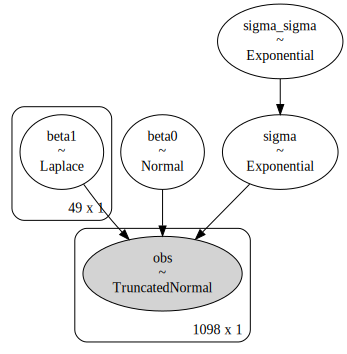

In [ ]:
pm.model_to_graphviz(BayesModel)

In [ ]:
with BayesModel:
    idata = pm.sample(3000, tune=1000)

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'sigma_sigma'}>,
        <Axes: title={'center': 'sigma_sigma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

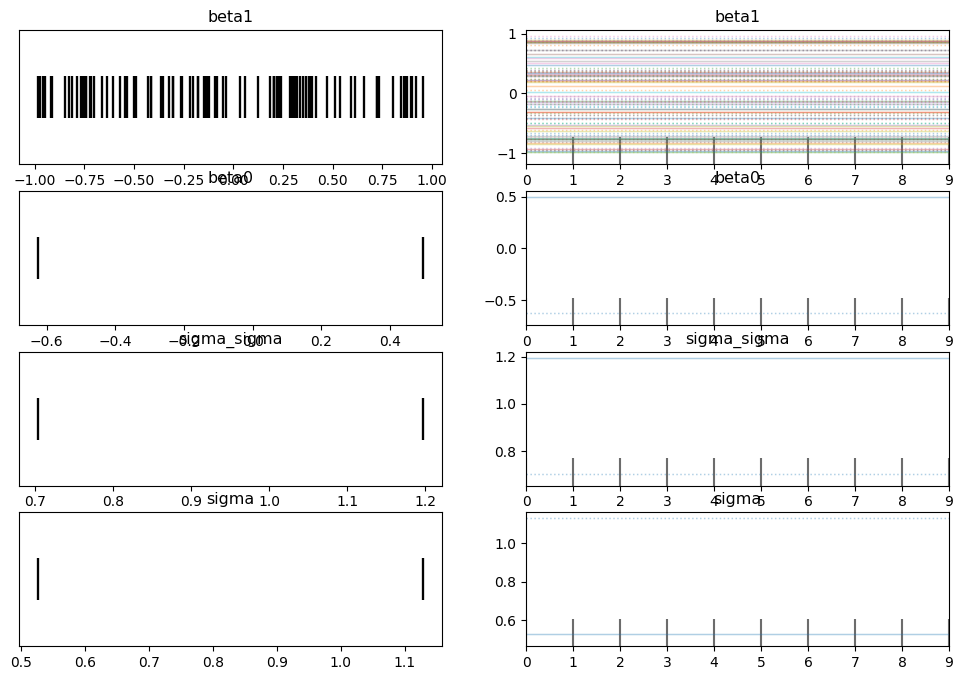

In [ ]:
az.plot_trace(idata)

In [ ]:
with pm.Model() as model:
    # priors
    beta0 = pm.Normal("beta0", mu=0, sigma=25)
    beta1 = pm.Normal("beta1", mu=0, sigma=25)
    # linear model
    mu = beta0 + pm.math.dot(X, beta1)
    p = pm.Deterministic("p", pm.math.invlogit(mu)).
    # likelihood
    Y_obs = pm.Binomial("y", n=100, p=p, observed=y)

SyntaxError: ignored

In [ ]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [ ]:

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=.25)
    beta = pm.Normal('beta', mu=0, sigma=.25, shape=X.shape[1])
    mu = alpha + pm.math.dot(X, beta)

    mu = pm.Deterministic("mu", mu)
    p = pm.Deterministic("p", pm.math.invlogit(mu))
    sigma = pm.HalfNormal('sigma', 0.01)

    Y_obs = pm.Beta('Y_obs', mu=p, sigma=sigma, observed=y/100)

    idata = pm.sample(100, tune=100)

SamplingError: ignored

In [ ]:


with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=X.shape[1])

    # Linear model
    mu = alpha + pm.math.dot(X, beta)
    mu = pm.Deterministic("mu", mu)

    # Logistic transformation
    p = pm.Deterministic("p", pm.math.sigmoid(mu))

    # upper_bound = pm.Deterministic('ub', pm.math.sqrt(p * (1 - p)))
    # Error term
    sigma = pm.Uniform('sigma', lower=0, upper=1)

    # Likelihood
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)  # Assuming y is scaled to make sense in this context

    # Sampling
    idata = pm.sample(1000, tune=1000)

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'sigma_sigma'}>,
        <Axes: title={'center': 'sigma_sigma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

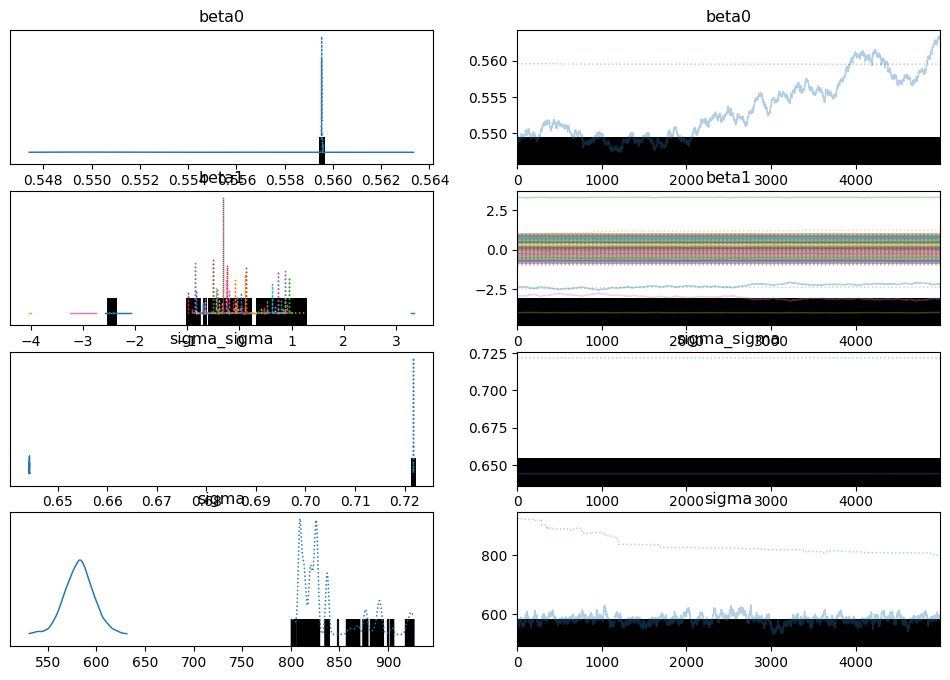

In [ ]:
az.plot_trace(idata)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

In [ ]:
X.shape

(11521, 84)

In [ ]:
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_star_score   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:17:44   Log-Likelihood:                 9995.0
No. Observations:               11521   AIC:                        -1.986e+04
Df Residuals:                   11457   BIC:                        -1.939e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
total_ghg_emissions_intensity                                                        0.0030      0.021      0.139      0.889      -0.039       0.045
national_median_site_eui                                                             0.0048      0.000     28.843      0.000       0.004       0.005
water_use_all_water_sources                                                       1.509e-08   2.98e-08      0.507      0.612   -4.33e-08    7.34e-08
weather_normalized_source                                                            0.0038      0.005      0.705      0.481      -0.007       0.014
avoided_emissions_offsite                                                           -0.0661      0.479     -0.138      0.890      -1.005       0.873
indirect_ghg_emissions_metric                                                       -0.0190      0.019     -0.997      0.319      -0.056       0.018
property_gfa_calculated_1                                                         4.757e-07   2.43e-07      1.954      0.051   -1.44e-09    9.53e-07
green_power_onsite_kwh                                                               0.0002      0.000      0.557      0.577      -0.000       0.001
net_emissions_metric_tons                                                           -0.3493      0.562     -0.622      0.534      -1.450       0.752
electricity_use_generated_3                                                         -0.2611      0.335     -0.780      0.435      -0.918       0.395
green_power_onsite_and_offsite                                                    7.594e-05      0.000      0.555      0.579      -0.000       0.000
direct_ghg_emissions_metric                                                         -0.0193      0.019     -1.008      0.314      -0.057       0.018
national_median_total_ghg                                                            0.0002   2.25e-05      7.228      0.000       0.000       0.000
weather_normalized_site_energy                                                    1.683e-07   1.55e-07      1.087      0.277   -1.35e-07    4.72e-07
source_energy_use_kbtu                                                            5.045e-08   3.34e-08      1.510      0.131    -1.5e-08    1.16e-07
site_eui_kbtu_ft                                                                    -0.0001      0.003     -0.036      0.971      -0.006       0.006
total_ghg_emissions_metric                                                           0.3684      0.561      0.656      0.512      -0.732       1.469
electricity_use_generated_1                                                         -0.2296      0.294 

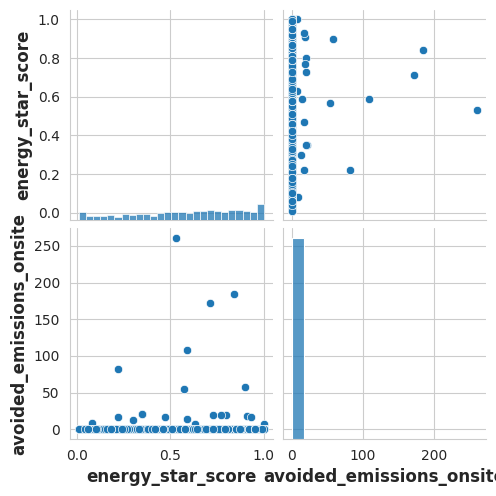

In [ ]:
sns.pairplot(df2[['energy_star_score', 'avoided_emissions_onsite']])

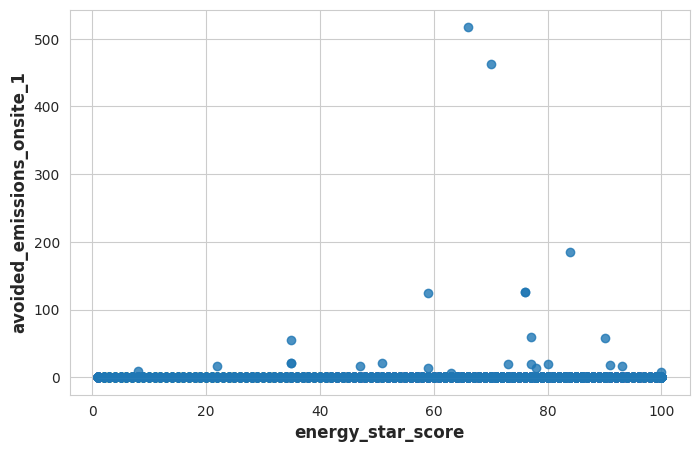

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
pylab.rcParams['figure.figsize'] = 8, 5
sns.set_style('whitegrid')

# df2 = pd.concat([X, y], axis=1)
y_test = 'avoided_emissions_onsite_1'
sns.regplot(x='energy_star_score', y=y_test, data=df2)
xs = np.arange(0, 100, 0.1)
# sns.lineplot(y=model.params[y_test] * xs, x=xs)

<Axes: xlabel='total_ghg_emissions_intensity', ylabel='Count'>

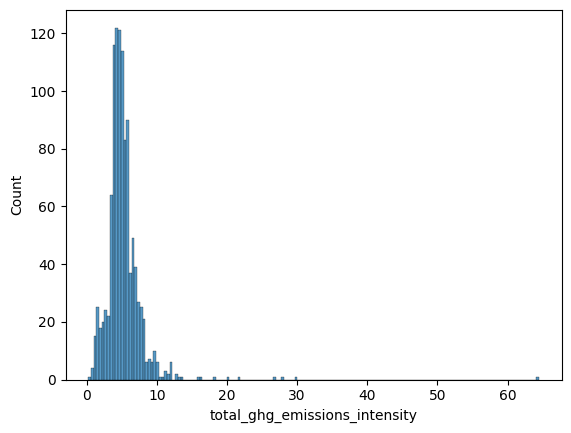

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(y)

<ipython-input-128-11773ccb75ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["total_ghg_emissions_intensity"] = _df["total_ghg_emissions_intensity"].astype(np.float64)


<Axes: xlabel='total_ghg_emissions_intensity', ylabel='Density'>

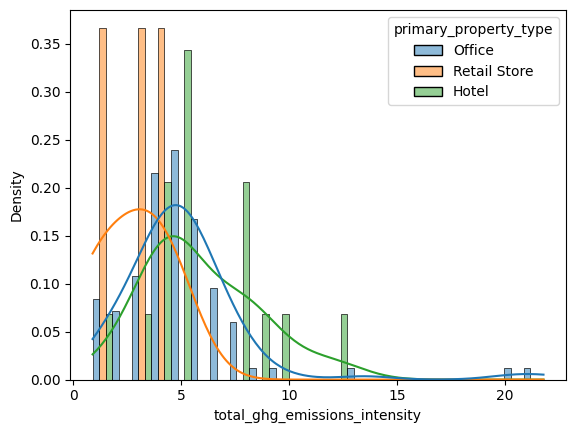

In [ ]:
_df = df[df.primary_property_type.isin(["Office", "Hotel", "Retail Store"])]
_df["total_ghg_emissions_intensity"] = _df["total_ghg_emissions_intensity"].astype(np.float64)
_df
sns.histplot(data=_df, x="total_ghg_emissions_intensity", hue="primary_property_type", stat="density", kde=True, common_norm=False, multiple="dodge")

In [ ]:
num_cols

['green_power_onsite_and_offsite',
 'largest_property_use_type_1',
 'electricity_use_grid_purchase_1',
 'weather_normalized_site_2',
 'electricity_use_generated_3',
 'egrid_output_emissions_rate',
 'water_use_all_water_sources',
 'occupancy',
 'natural_gas_use_kbtu',
 'source_energy_use_kbtu',
 'green_power_onsite_kwh',
 'weather_normalized_site_1',
 'diesel_2_use_kbtu',
 'avoided_emissions_onsite_1',
 'natural_gas_use_therms',
 'weather_normalized_site_3',
 'year_built',
 'percent_of_recs_retained',
 'avoided_emissions_offsite',
 'weather_normalized_site_energy',
 'fuel_oil_5_6_use_kbtu',
 'energy_star_score',
 'property_gfa_calculated_1',
 'electricity_use_generated_1',
 'weather_normalized_source_1',
 'electricity_use_grid_purchase',
 'weather_normalized_site_eui',
 'site_eui_kbtu_ft',
 'percent_of_total_electricity',
 'total_ghg_emissions_intensity',
 'weather_normalized_source',
 'electricity_use_grid_purchase_3',
 'propane_use_kbtu',
 'weather_normalized_site',
 'fuel_oil_2_use_k

In [ ]:
_df = df[df.borough.isin(["BRONX"])]
_df["total_ghg_emissions_intensity"] = _df["total_ghg_emissions_intensity"].astype(np.float64)
_df["year_built"] = _df["year_built"].astype(np.float64)

sns.regplot(data=_df, x='year_built', y="total_ghg_emissions_intensity")

_df = df[df.borough.isin(["MANHATTAN"])]
_df["total_ghg_emissions_intensity"] = _df["total_ghg_emissions_intensity"].astype(np.float64)
_df["year_built"] = _df["year_built"].astype(np.float64)
# sns.regplot(data=_df, x='year_built', y="total_ghg_emissions_intensity")

NameError: ignored

# METRICS TO START COMPARING BUILDINGS WITH:
(These metrics don't depend on square footage, etc. therefore could be a good indicator of energy efficiency for different types of buildings) <br> <br>

'energy_star_score', <br>
'energy_star_certification_1' <br>
'site_eui_kbtu_ft' <br>
'weather_normalized_site_eui' <br>  
'total_ghg_emissions_intensity' <br>
'direct_ghg_emissions_intensity' <br>
'indirect_ghg_emissions_intensity' <br>

In [ ]:
!pip install pymc
!pip install arviz